In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 
path = 'Data/'

In [2]:
df = pd.read_csv(path+'training.1600000.processed.noemoticon.csv',  header=None, 
                 encoding="ISO-8859-1")

In [3]:
# Set proper column names
df.rename({0: 'target', 1: 'ids', 2: 'tweet_date', 3: 'flag',
          4: 'user', 5: 'text'}, axis=1, inplace=True)

In [4]:
df.head()

,target,ids,tweet_date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

### Pre-processing & Data Cleaning

In [6]:
# import libraries
import re
import nltk
from nltk.corpus import stopwords
# 
# from nltk.tokenize import word_tokenize 
# import stemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
# 
# nltk.download('wordnet')
# nltk.download('stopwords')
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [7]:
# Create an object of class Stemmers & Lemmatizer
porter = PorterStemmer()
lancaster = LancasterStemmer()
englishStemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

### Testing to Determine Stemmer

In [8]:
word_list = ["friendly", "friendship", "friends", "friendships","need", "boiling",
             "destabilize","misunderstanding", "faith", "destabilizing", "disstable",
             "railroad","screaming","football", "township", "can", "would've"]

In [9]:
for word in word_list:
    print("{0:20}{1:20}{2:20}{3:20}{4:20}".format(word,
                                          porter.stem(word),
                                          englishStemmer.stem(word),
                                          lancaster.stem(word),      
                                          lemmatizer.lemmatize(word,pos="v")))

friendly            friendli            friend              friend              friendly            
friendship          friendship          friendship          friend              friendship          
friends             friend              friend              friend              friends             
friendships         friendship          friendship          friend              friendships         
need                need                need                nee                 need                
boiling             boil                boil                boil                boil                
destabilize         destabil            destabil            dest                destabilize         
misunderstanding    misunderstand       misunderstand       misunderstand       misunderstand       
faith               faith               faith               fai                 faith               
destabilizing       destabil            destabil            dest                destabilize

#### Select Lancaster Stemmer

In [10]:
# all the stop words minus "not"
stop_words = set(stopwords.words('english')) 
print('before: ' , len(stop_words))
stop_words.remove('not')
stop_words.add('u')
print('after: ' , len(stop_words))

before:  179
after:  179


### Clean Tweet & Apply Lancaster Stemmer

In [11]:
def preprocess(text):
        text = text.lower() # lower case
        # specific
        text = re.sub(r"won\'t", "will not", text)
        text = re.sub(r"can\'t", "can not", text)
        text = re.sub("lol", " laughing out loud ", text)
        text = re.sub("idk", " i do not know ", text)
        text = re.sub("omg", " oh my god ", text)
        text = re.sub(" youll", " you will ", text)

        # general
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)       
        text = re.sub('#\S+ ', '', text) # removing hashtags
        text = re.sub('#\S+', '', text) # removing hashtags at he end
        text = re.sub('http:\S+ ', '', text) # removing web links
        text = re.sub('http:\S+', '', text) # removing web links at the end
        text = re.sub('www.\S+ ', '', text) # removing web links
        text = re.sub('www.\S+', '', text) # removing web links at the end
        text = re.sub('@\S+ ', '', text) # removing @tag
        text = re.sub('@\S+', '', text)  # removing @tag when no space at the end
        text = re.sub('[^a-zA-Z]', ' ', text) # remove all non characters
        text = text.split()
        text = [lancaster.stem(word) for word in text if not word in set(stop_words)]
        return ' '.join(text)

In [12]:
# Ckean Tweet
%time df['text_clean'] = df['text'].apply(lambda x: preprocess(x))

CPU times: user 2min 44s, sys: 110 ms, total: 2min 44s
Wall time: 2min 44s


In [13]:
pd.set_option("display.max_colwidth", 0)
df[['target', 'text','text_clean']].sample(10)

,target,text,text_clean
947132,4,has being on youtube watching 2PM! i think im obsessed with this group after watching Idol Army on youtube! Blame it on YOUTUBE!!,youtub watch pm think im obsess group watch idol army youtub blam youtub
790555,0,@Nelicion So sorry to hear that!,sorry hear
1109791,4,Yeaaah tomorrow the MTV Movie Awards! I'll be watching it,yeaaah tomorrow mtv movy award watch
622834,0,i want another horsey,want anoth horsey
194136,0,Yahoo! 360 to Shut Down - Tin ??n ?ï¿½ thï¿½nh hi?n th?c. ?i?u nï¿½y th?t ch?ng mong mu?n t?o nï¿½o nh?ng ch? cï¿½... http://tumblr.com/xyu1wmbzw,yahoo shut tin n th nh hi n th c n th ch ng mong mu n n nh ng ch c
353285,0,@katiebug1112 HELLO! Nothing happened. Got an infection in my foot annoying but doesn't hurt anymore.. How are you? Miss you too,hello noth hap got infect foot annoy not hurt anym miss
86509,0,@mikebarrett647 Yeah it was the megane battery that was dead. I think I killed it's battery jump starting the Saxo from hibernation.,yeah meg battery dead think kil battery jump start saxo hibern
1548121,4,&quot;Your mum's a Hufflepuff&quot; WIN Greg Holden's music = amazing,quot mum hufflepuff quot win greg hold mus amaz
1474576,4,@ChuckTolsma NO!!!!! CAPS = YELLING.. which I was doing.. You dont like it.. UNFOLLOW ME Have a nice day and GO #KYLEBUSCH GOOOOO!!!!,cap yel dont lik unfollow nic day go gooooo
1400329,4,@CatherineJoan welcome to twitter lol,welcom twit laugh loud


In [14]:
# two target values (binary classification)
df.loc[df.target > 0, "target"] = 1

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

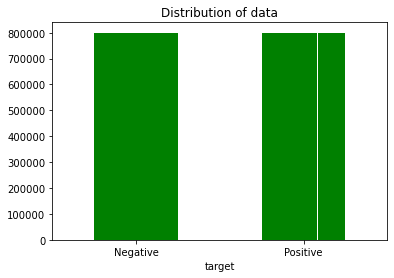

In [15]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', color = 'green', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [16]:
pd.Series(' '.join(df.text_clean).split()).value_counts()[:10]

not      292036
get      110917
day      108276
good     92504 
work     88161 
lik      84000 
lov      83818 
go       74000 
quot     73139 
today    68686 
dtype: int64

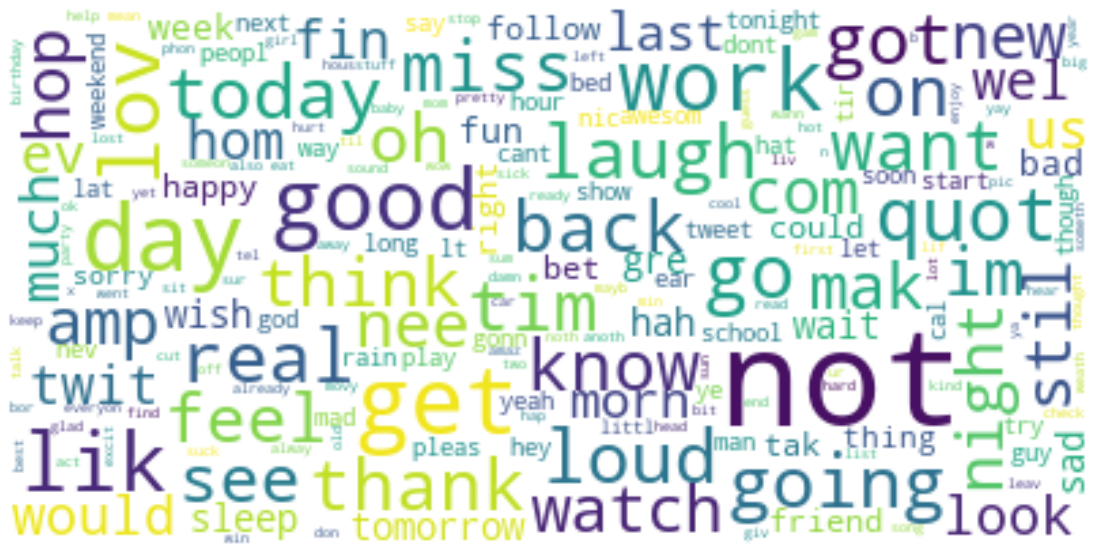

In [17]:
# Word cloud using frequency
words = pd.DataFrame(pd.Series(' '.join(df.text_clean).split()).value_counts())
words.reset_index(inplace=True)
# 
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white")
# 
d = {}
for a, x in words.values:
    d[a] = x
#     
wordcloud.generate_from_frequencies(frequencies=d, max_font_size=50)
plt.figure(figsize=[20,10])
# interpolation="bilinear": This is to make the displayed image appear more smoothly.
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
df.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [19]:
# checking for nulls
df.isnull().sum()

target        0
ids           0
tweet_date    0
flag          0
user          0
text          0
text_clean    0
dtype: int64

### User function

In [20]:
def scoring_model(model, X_train, X_test, y_train, y_test, y_pred):
    # Import
    from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
    #
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, 
                                                                    model.predict_proba(X_train)[:,1])
    #
    tr_score = model.score(X_train, y_train)
    ts_score = model.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    auc = auc(false_positive_rate, true_positive_rate)
    roc_tr = roc_auc_score(y_train, model.predict(X_train))
    roc_t = roc_auc_score(y_test, model.predict(X_test))
    return tr_score,ts_score,acc,auc,roc_tr,roc_t

## Vectorizer

In [21]:
# import library
from sklearn.model_selection import train_test_split
# Getting tokenization of tweet text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# 
t_size = 0.20
seed = 11
# 

# TfidfVectorizer: unigrams and bigrams
parms_t = {'max_df' : 0.995,
           'min_df': 0.001,
#            'ngram_range' : (1,2),
          }
# CountVectorizer
parms_c = {'max_df' : 0.995,
           'min_df': 0.001,
#            'ngram_range': (1,2),
          }
# 

### Count Vectorizer

In [22]:
# incode Count Vectorizer
cv = CountVectorizer(**parms_c)
# 
X = cv.fit_transform(df.text_clean).toarray()
y = df.target
# 
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=t_size, random_state=seed)
# 
print('Count Vectorizer shape: ', X.shape)
# 

Count Vectorizer shape:  (1600000, 1014)


### Tfidf Vectorizer

In [23]:
# incode Tfidf Vectorizer
tv = TfidfVectorizer(**parms_t)
# 
X_ = tv.fit_transform(df.text_clean).toarray()
y_ = df.target
# 
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_, y_, test_size=t_size, random_state=seed)
# 
print('Tfidf Vectorizer shape: ', X_.shape, )
# 

Tfidf Vectorizer shape:  (1600000, 1014)


### Base Model Performance 

In [24]:
from sklearn.dummy import DummyClassifier
# Count
dummy_clf_c = DummyClassifier(strategy="stratified")
# 
dummy_clf_c.fit(X_train_c, y_train_c)
# 
dummy_clf_c.predict(X_test_c)
# Tfidf
dummy_clf_f = DummyClassifier(strategy="stratified")
# 
dummy_clf_f.fit(X_train_t, y_train_t)
# 
dummy_clf_f.predict(X_test_t)
# 
print('Count Base Score: ', dummy_clf_c.score(X_test_c, y_test_c))
print('Tfidf Base Score: ' ,dummy_clf_c.score(X_test_t, y_test_t))


Count Base Score:  0.500153125
Tfidf Base Score:  0.4979625


### Binary Classification Models

In [25]:
# Import
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
# 
# 
params_lgbm = {'objective': 'binary',
               'metric': 'auc',
               'n_jobs' : (-1),
               'random_state' : seed,
              }
# 

#### Light GBM Classifier with Count Vectorizer

In [26]:
# Light GBM Classifier 
lgbm_c = LGBMClassifier(**params_lgbm)
# Train LGBM Classifier
%time lgbm_c.fit(X_train_c, y_train_c)
# Predict the response for test dataset
y_pred_c = lgbm_c.predict(X_test_c)
# 
print('\n')
cm = confusion_matrix(y_test_c, y_pred_c)
print(cm)
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(lgbm_c, X_train_c, X_test_c, y_train_c, y_test_c, y_pred_c)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
# 

CPU times: user 1min 39s, sys: 7.71 s, total: 1min 47s
Wall time: 19.2 s


[[112656  47741]
 [ 33076 126527]]


Training set score:         0.7477343750
Test set score:             0.7474468750
Accuracy Test set Score:    0.7474468750
AUC Score:                  0.8276650799
ROC AUC Training set Score: 0.7477059170
ROC AUC Test set Score:     0.7475590319


#### Light GBM Classifier with Tfidf Vectorizer

In [27]:
# LGBM Classifier
lgbm_t = LGBMClassifier(**params_lgbm)
# Train LGBM Classifier
%time lgbm_t.fit(X_train_t, y_train_t)
# Predict the response for test dataset
y_pred_t = lgbm_t.predict(X_test_t)
# 
print('\n')
cm = confusion_matrix(y_test_t, y_pred_t)
print(cm)
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(lgbm_t, X_train_t, X_test_t, y_train_t, y_test_t, y_pred_t)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
# 

CPU times: user 4min 32s, sys: 11.4 s, total: 4min 43s
Wall time: 22.5 s


[[112820  47577]
 [ 32823 126780]]


Training set score:         0.7497593750
Test set score:             0.7487500000
Accuracy Test set Score:    0.7487500000
AUC Score:                  0.8303661123
ROC AUC Training set Score: 0.7497306571
ROC AUC Test set Score:     0.7488628550


#### Bayesian Optimization Count Vectorizer

In [28]:
# import
from bayes_opt import BayesianOptimization
import lightgbm
# 
def lgb_eval_c(num_leaves, max_depth, lambda_l2, lambda_l1, min_child_samples, min_data_in_leaf, \
               learning_rate, subsample_freq):
    params = {
        "objective" : "binary",
        "metric" : "auc", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : learning_rate,
        "subsample_freq" : int(subsample_freq),
        "bagging_seed" : seed,
        "verbosity" : -1
    }
#     lgtrain = lightgbm.Dataset(X_train, y_train,categorical_feature=categorical_features)
    lgtrain_c = lightgbm.Dataset(X_train_c, y_train_c)
    cv_result = lightgbm.cv(params,
                       lgtrain_c,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=5)
    return cv_result['auc-mean'][-1]
# 
lgbBO_c = BayesianOptimization(lgb_eval_c, {'num_leaves': (25, 4000),
                                        'max_depth': (5, 63),
                                        'lambda_l2': (0.0, 0.05),
                                        'lambda_l1': (0.0, 0.05),
                                        'min_child_samples': (50, 10000),
                                        'min_data_in_leaf': (100, 2000),
                                        'learning_rate': (0.001, 2.0),
                                        'subsample_freq': (1, 10),
                                        })

%time lgbBO_c.maximize(n_iter=10, init_points=1)
# 

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_da... | num_le... | subsam... |
-------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=764, min_child_samples=6822 will be ignored. Current value: min_data_in_leaf=764
|  1        |  0.8444   |  0.0324   |  0.0342   |  0.9883   |  6.102    |  6.822e+0 |  764.2    |  1.821e+0 |  7.837    |
|  2        |  0.8512   |  0.02913  |  0.02749  |  0.4473   |  50.89    |  4.348e+0 |  404.3    |  1.24e+03 |  6.43     |
|  3        |  0.8457   |  0.006896 |  0.02038  |  0.357    |  5.242    |  4.207e+0 |  260.6    |  1.155e+0 |  6.242    |
|  4        |  0.8298   |  0.007443 |  0.004484 |  1.113    |  7.397    |  9.376e+0 |  1.989e+0 |  201.5    |  2.58     |
|  5        |  0.8454   |  0.04461  |  0.000333 |  1.217    |  35.25    |  4.682e+0 |  704.1    |  1.35e+03 |  2.298    |
|  6        |  0.846

In [29]:
# Capture Best Bayesian Optimization Values
params_BO_c = lgbBO_c.max
params_BO_c = params_BO_c['params']
# Round to INT keys
info = ['max_depth','min_child_samples', 'min_data_in_leaf', 'num_leaves', 'subsample_freq']
# 
# merge dictionaries in one line by simply using the unpacking operator (**)
params_BO_c = {**params_lgbm, **params_BO_c,}
# 
for k, v in params_BO_c.items():
    if k in info:
        params_BO_c[k] = int(v) 
# 
# LGBM Classifier
lgbm_BO_c = LGBMClassifier(**params_BO_c)
# Train LGBM Classifier
%time lgbm_BO_c.fit(X_train_c, y_train_c)
# Predict the response for test dataset
y_pred_bc = lgbm_BO_c.predict(X_test_c)
# 
print('\n')
cm = confusion_matrix(y_test_c, y_pred_bc)
print(cm)
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(lgbm_BO_c, X_train_c, X_test_c, y_train_c, y_test_c, y_pred_bc)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
# 

CPU times: user 2min 6s, sys: 2min 4s, total: 4min 11s
Wall time: 19.3 s


[[118979  41418]
 [ 32888 126715]]


Training set score:         0.7738570313
Test set score:             0.7677937500
Accuracy Test set Score:    0.7677937500
AUC Score:                  0.8550329353
ROC AUC Training set Score: 0.7738402835
ROC AUC Test set Score:     0.7678584616


#### Bayesian Optimization Tfidf Vectorizer

In [30]:
# import
from bayes_opt import BayesianOptimization
import lightgbm
# 
# categorical_features = ['text_clean']
# 
def lgb_eval(num_leaves, max_depth, lambda_l2, lambda_l1, min_child_samples, min_data_in_leaf, \
             learning_rate,subsample_freq):
    params = {
        "objective" : "binary",
        "metric" : "auc", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : learning_rate,
        "subsample_freq" : int(subsample_freq),
        "bagging_seed" : seed,
        "verbosity" : -1
    }
    # lgtrain = lightgbm.Dataset(X_train, y_train,categorical_feature=categorical_features)
    lgtrain = lightgbm.Dataset(X_train_t, y_train_t)
    cv_result = lightgbm.cv(params,
                       lgtrain,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=5)
    return cv_result['auc-mean'][-1]
# 
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 4000),
                                        'max_depth': (5, 63),
                                        'lambda_l2': (0.0, 0.05),
                                        'lambda_l1': (0.0, 0.05),
                                        'min_child_samples': (50, 10000),
                                        'min_data_in_leaf': (100, 2000),
                                        'learning_rate': (0.001, 2.0),
                                        'subsample_freq': (1, 10),
                                        })

%time lgbBO.maximize(n_iter=10, init_points=1)
# 

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_da... | num_le... | subsam... |
-------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=1081, min_child_samples=2858 will be ignored. Current value: min_data_in_leaf=1081
|  1        |  0.8451   |  0.01541  |  0.01291  |  0.6666   |  7.182    |  2.859e+0 |  1.082e+0 |  1.212e+0 |  8.004    |
|  2        |  0.7514   |  0.03877  |  0.04631  |  1.977    |  32.77    |  3.086e+0 |  1.164e+0 |  3.4e+03  |  8.603    |
|  3        |  0.8424   |  0.02775  |  0.000226 |  0.1513   |  51.74    |  2.01e+03 |  1.531e+0 |  1.687e+0 |  6.821    |
|  4        |  0.8342   |  0.02592  |  0.04939  |  1.534    |  14.33    |  1.823e+0 |  1.268e+0 |  298.7    |  5.061    |
|  5        |  0.8359   |  0.005299 |  0.01263  |  0.8742   |  41.25    |  1.449e+0 |  1.752e+0 |  1.12e+03 |  4.931    |
|  6        |  0.8

In [31]:
# Capture Best Bayesian Optimization Values
params_BO = lgbBO.max
params_BO = params_BO['params']
# Round to INT keys
info = ['max_depth','min_child_samples', 'min_data_in_leaf', 'num_leaves', 'subsample_freq']
# 
# merge dictionaries in one line by simply using the unpacking operator (**)
params_BO = {**params_lgbm, **params_BO,}
# 
for k, v in params_BO.items():
    if k in info:
        params_BO[k] = int(v) 
# 
# LGBM Classifier
lgbm_BO_t = LGBMClassifier(**params_BO)
# Train LGBM Classifier
%time lgbm_BO_t.fit(X_train_t, y_train_t)
# Predict the response for test dataset
y_pred_bt = lgbm_BO_t.predict(X_test_t)
# 
print('\n')
cm = confusion_matrix(y_test_t, y_pred_bt)
print(cm)
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(lgbm_BO_t, X_train_t, X_test_t, y_train_t, y_test_t, y_pred_bt)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
# 

CPU times: user 4min 33s, sys: 3min 7s, total: 7min 40s
Wall time: 29.7 s


[[119874  40523]
 [ 33794 125809]]


Training set score:         0.7931585937
Test set score:             0.7677593750
Accuracy Test set Score:    0.7677593750
AUC Score:                  0.8773851967
ROC AUC Training set Score: 0.7931455569
ROC AUC Test set Score:     0.7678101215
